# EDA: Population Types in time_series.csv

hier haben wir zunächst geschaut was für Daten wir in time_series.csv haben, untersucht welche population types am häufigsten vorkommen und geschauft welches die Herunfts und Zielländer mit den grössten Flüchtlingsbewegungen waren.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:

PATH = "/Users/valeria/Documents/java hsg/Statistik/refugeee_projekt/statistik_datensatz_refugee/time_series.csv"

df = pd.read_csv(PATH)
df.head()

/var/folders/sn/c9kfzmnn0bn5trb4lsr2ctzm0000gn/T/ipykernel_40676/971745180.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH)


,Year,Country / territory of asylum/residence,Origin,Population type,Value
0,1951,Australia,Various/Unknown,Refugees (incl. refugee-like situations),180000
1,1951,Austria,Various/Unknown,Refugees (incl. refugee-like situations),282000
2,1951,Belgium,Various/Unknown,Refugees (incl. refugee-like situations),55000
3,1951,Canada,Various/Unknown,Refugees (incl. refugee-like situations),168511
4,1951,Switzerland,Various/Unknown,Refugees (incl. refugee-like situations),10000


## Spalten, Datentypen, fehlende Werte

In [5]:
print("Shape:", df.shape)
print("\nSpalten:")
print(df.columns.tolist())

print("\nDtypes:")
print(df.dtypes)

print("\nMissing Values (Top 10):")
print(df.isna().sum().sort_values(ascending=False).head(10))

Shape: (298441, 5)

Spalten:
['Year', 'Country / territory of asylum/residence', 'Origin', 'Population type', 'Value']

Dtypes:
Year                                        int64
Country / territory of asylum/residence    object
Origin                                     object
Population type                            object
Value                                      object
dtype: object

Missing Values (Top 10):
Year                                       0
Country / territory of asylum/residence    0
Origin                                     0
Population type                            0
Value                                      0
dtype: int64


In [6]:
# Year numeric
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# Value numeric 
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

df[["Year", "Value"]].describe()

,Year,Value
count,298441.000000,2.942330e+05
mean,2009.952232,3.333808e+03
std,7.239846,6.402319e+04
min,1951.000000,-1.000000e+00
25%,2007.000000,0.000000e+00
50%,2014.000000,1.000000e+00
75%,2015.000000,1.700000e+01
max,2016.000000,7.632500e+06


##  Population Types 

In [7]:
# Liste aller Population Types 
population_types = sorted(df["Population type"].dropna().unique().tolist())
population_types

['Asylum-seekers',
 'Internally displaced persons',
 'Others of concern',
 'Refugees (incl. refugee-like situations)',
 'Returned IDPs',
 'Returnees',
 'Stateless']

### Summe der Werte pro Population Type (über alle Jahre & Länder)

In [8]:
type_totals = (
    df.groupby("Population type")["Value"]
      .sum(min_count=1)
      .sort_values(ascending=False)
)

type_totals

Population type
Refugees (incl. refugee-like situations)    529498732.0
Internally displaced persons                299001999.0
Stateless                                    49884483.0
Returned IDPs                                31295717.0
Returnees                                    31046037.0
Asylum-seekers                               20553975.0
Others of concern                            19635461.0
Name: Value, dtype: float64

## Globale Entwicklung pro Jahr 

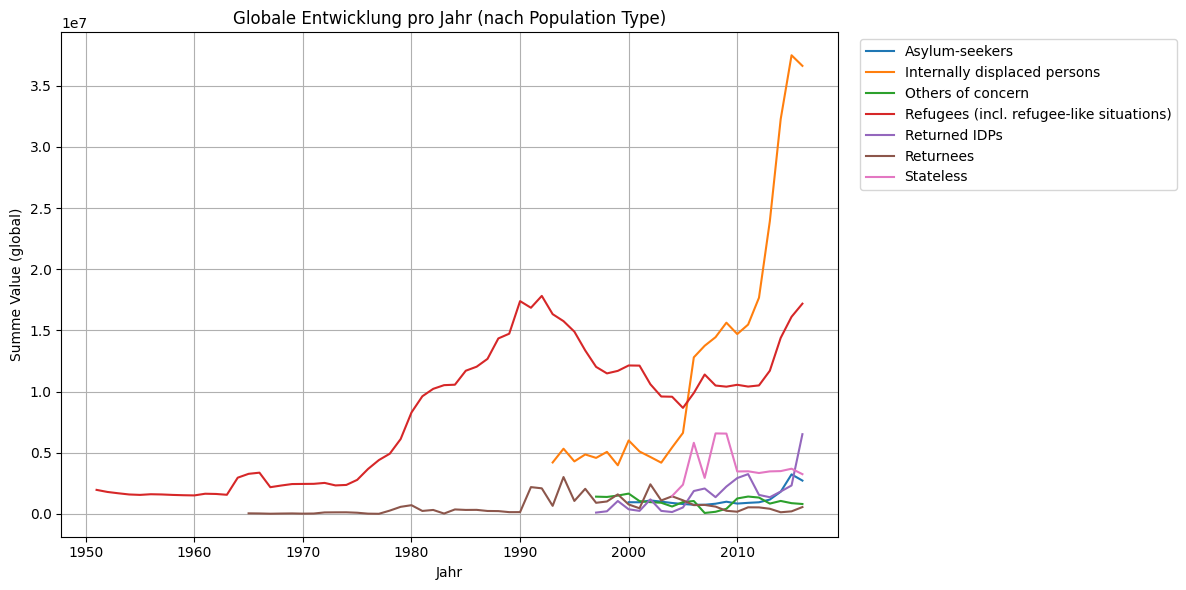

In [9]:
# Jährliche Summe pro Population Type (global, über alle Länder)
year_type = (
    df.groupby(["Year", "Population type"])["Value"]
      .sum(min_count=1)
      .reset_index()
      .dropna(subset=["Year"])
)

# Pivot für Linienplot
pivot = year_type.pivot(index="Year", columns="Population type", values="Value").sort_index()

plt.figure(figsize=(12,6))
for col in pivot.columns:
    plt.plot(pivot.index, pivot[col], label=col)
plt.title("Globale Entwicklung pro Jahr (nach Population Type)")
plt.xlabel("Jahr")
plt.ylabel("Summe Value (global)")
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

##  Vergleich in einem Jahr 

Jahr-Min: 1951 | Jahr-Max: 2016


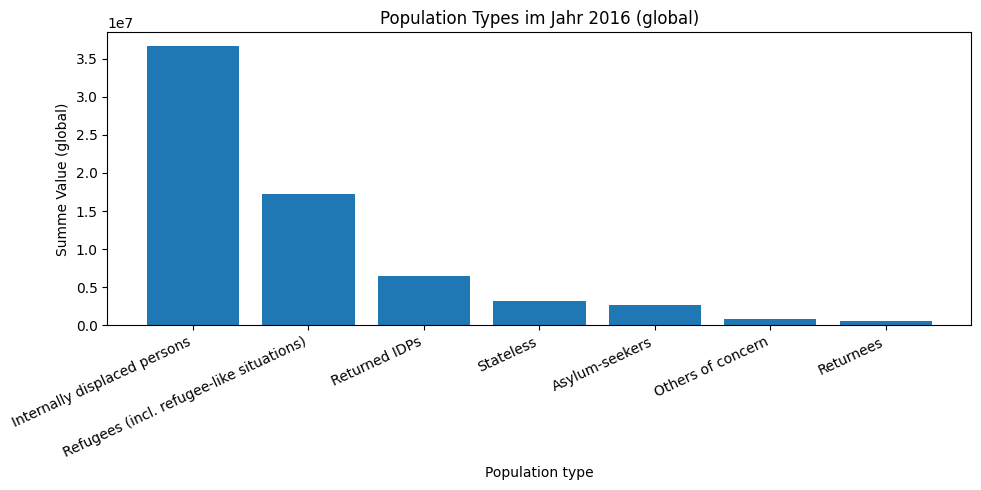

In [11]:

year_max = int(np.nanmax(df["Year"].values))
year_min = int(np.nanmin(df["Year"].values))
print("Jahr-Min:", year_min, "| Jahr-Max:", year_max)

YEAR_TO_SHOW = year_max  

one_year = year_type[year_type["Year"] == YEAR_TO_SHOW].copy()
one_year = one_year.sort_values("Value", ascending=False)

plt.figure(figsize=(10,5))
plt.bar(one_year["Population type"], one_year["Value"])
plt.title(f"Population Types im Jahr {YEAR_TO_SHOW} (global)")
plt.xlabel("Population type")
plt.ylabel("Summe Value (global)")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()

## Vergleich Refugees und Asylum-seekers

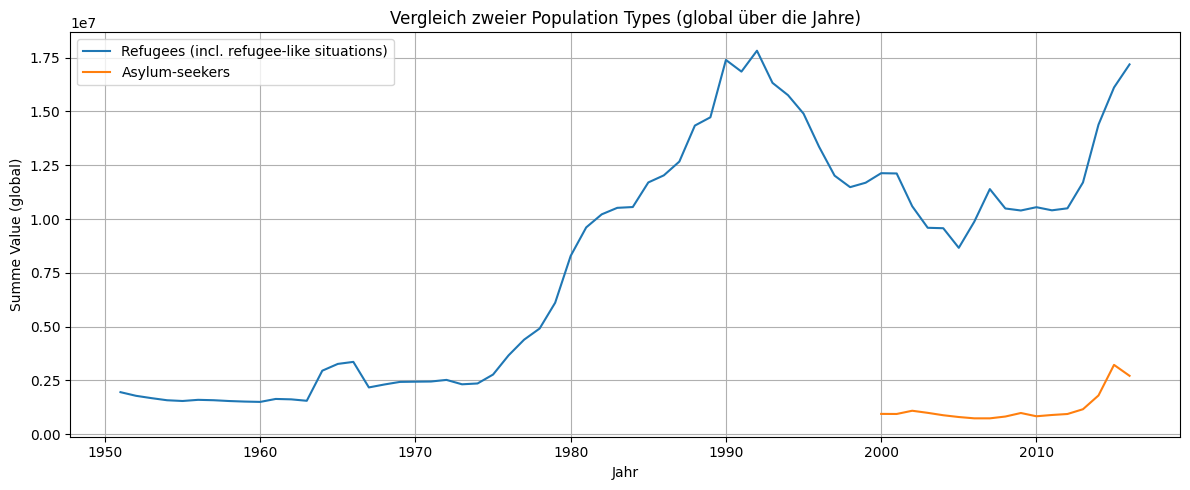

In [14]:
TYPE_A = "Refugees (incl. refugee-like situations)"
TYPE_B = "Asylum-seekers"

two = pivot[[c for c in [TYPE_A, TYPE_B] if c in pivot.columns]].copy()

plt.figure(figsize=(12,5))
for col in two.columns:
    plt.plot(two.index, two[col], label=col)
plt.title("Vergleich zweier Population Types (global über die Jahre)")
plt.xlabel("Jahr")
plt.ylabel("Summe Value (global)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Top 10 Länder

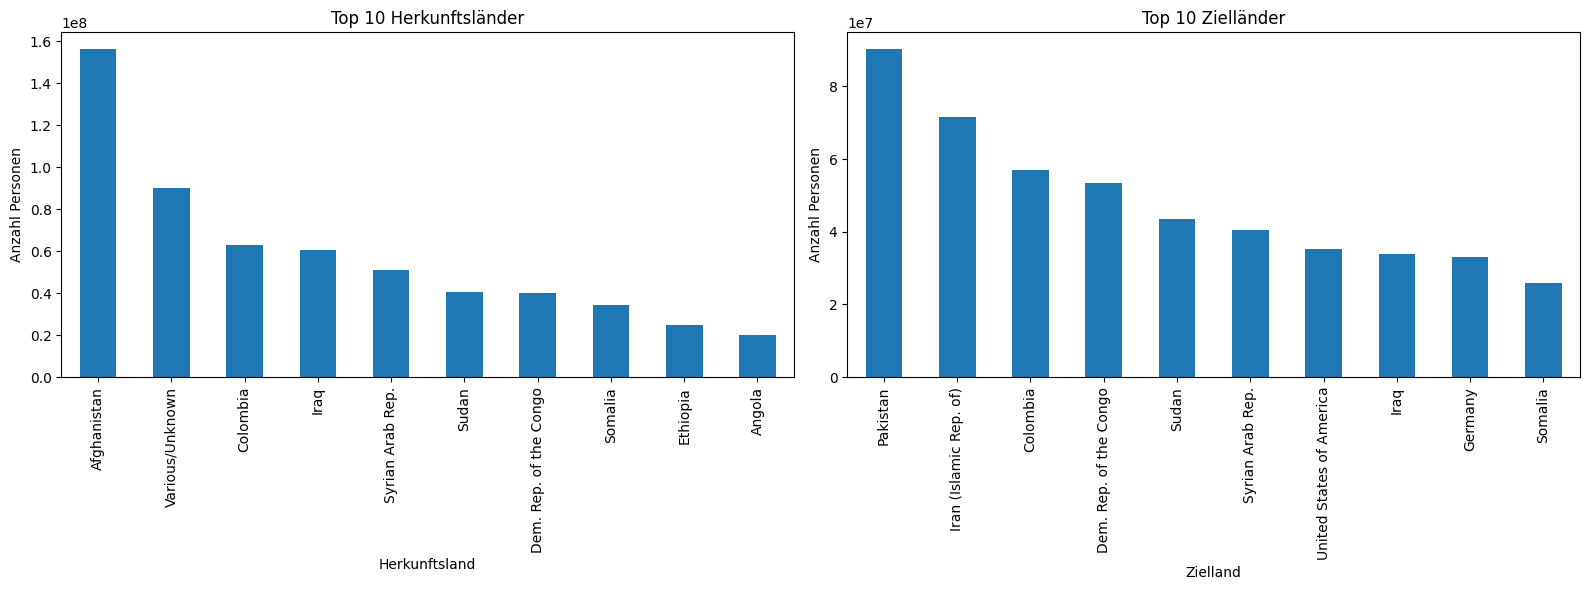

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top10_origin_and_destination(df):
    
    df = df.copy()

    df["Value"] = pd.to_numeric(df["Value"], errors="coerce")
    df = df.dropna(subset=["Value"])

    # Top 10 Herkunftsländer
    top10_origin = (
        df.groupby("Origin")["Value"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )

    # Top 10 Zielländer
    top10_destination = (
        df.groupby("Country / territory of asylum/residence")["Value"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )

    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    top10_origin.plot(
        kind="bar",
        ax=axes[0]
    )
    axes[0].set_title("Top 10 Herkunftsländer")
    axes[0].set_xlabel("Herkunftsland")
    axes[0].set_ylabel("Anzahl Personen")

    top10_destination.plot(
        kind="bar",
        ax=axes[1]
    )
    axes[1].set_title("Top 10 Zielländer")
    axes[1].set_xlabel("Zielland")
    axes[1].set_ylabel("Anzahl Personen")

    plt.tight_layout()
    plt.show()

    return top10_origin, top10_destination



top10_origin, top10_destination = plot_top10_origin_and_destination(df)

## Fazit 

- Population type enthält mehrere Gruppen (Refugees, IDPs, Stateless, …).
- Datensatz relativ vollständig.    
- Man kann pro Gruppe Zeitreihenplots machen oder Gruppen direkt vergleichen.
- Für fast alle Analysen ist es wichtig, dass Year und Value wirklich numerisch sind, sonst funktionieren Summen/Plots nicht sauber.